In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [3]:
n_events,n_columns = df.shape
print('number of events = %d and number of columns = %d'%(n_events,n_columns))

number of events = 239677 and number of columns = 29


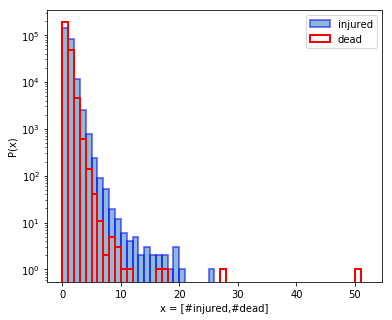

In [22]:
#----------- histograms -------------#
Injuries,Deaths = df.n_injured,df.n_killed
bin_size = 1
Y1,X1 = np.histogram(Injuries,bins=np.arange(0,np.max(Injuries),bin_size),normed=False)
X1 = 0.5*(X1[:-1]+X1[1:])

Y2,X2 = np.histogram(Deaths,bins=np.arange(0,np.max(Injuries),bin_size),normed=False)
X2 = 0.5*(X2[:-1]+X2[1:])

fig,ax = plt.subplots(figsize=(6,5))
ax.bar(X1,Y1,edgecolor='b',width=bin_size,alpha=0.5,fill=True,lw=2,label='injured')
ax.bar(X2,Y2,edgecolor='r',width=bin_size,alpha=1.0,fill=False,lw=2,label='dead')
ax.set_yscale('log')
ax.set_xlabel(r'x = [#injured,#dead]')
ax.set_ylabel('P(x)')
ax.legend()
plt.savefig('histogram.png',dpi=300,bbox_inches='tight')
plt.show()

(512, 1024)


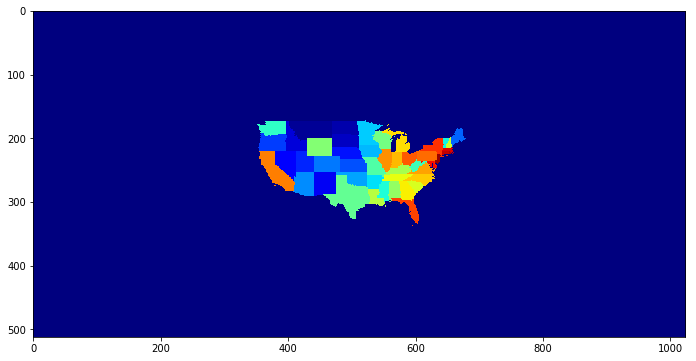

In [18]:
UM = np.load('USA_States_Array.npy')
print(UM.shape)
fig,ax = plt.subplots(figsize=(12,6))
ax.imshow(UM,cmap='jet')
plt.savefig('ocean.png',dpi=300,bbox_inches='tight')
plt.show()

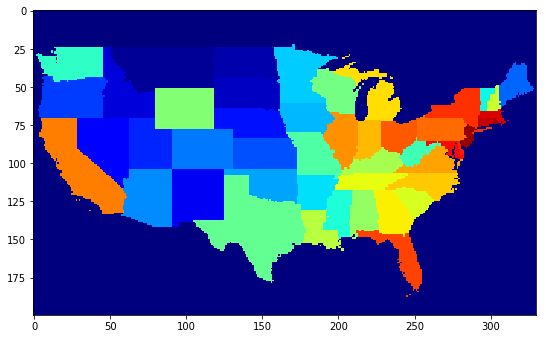

In [6]:

fig,ax = plt.subplots(figsize=(9,6))
ax.imshow(UM[150:350,350:680],cmap='jet')
plt.show()


In [7]:
States = np.unique(df.state)
print(States)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [8]:
USD = eval(open('/home/kachandra/Dropbox/Github/GunViolence/USA_States_Index.dict','r').read())
print(USD)

{'Ocean': 0, 'Montana': 1, 'North Dakota': 2, 'South Dakota': 3, 'Idaho': 4, 'New Mexico': 5, 'Nevada': 6, 'Nebraska': 7, 'Utah': 8, 'Oregon': 9, 'Kansas': 10, 'Maine': 11, 'Colorado': 12, 'Arizona': 13, 'Oklahoma': 14, 'Iowa': 15, 'Minnesota': 16, 'Arkansas': 17, 'Vermont': 18, 'Mississippi': 19, 'Washington': 20, 'West Virginia': 21, 'Missouri': 22, 'Texas': 23, 'Wisconsin': 24, 'Wyoming': 25, 'Alabama': 26, 'Kentucky': 27, 'Louisiana': 28, 'New Hampshire': 29, 'South Carolina': 30, 'Tennessee': 31, 'Georgia': 32, 'Michigan': 33, 'North Carolina': 34, 'Indiana': 35, 'Virginia': 36, 'Illinois': 37, 'California': 38, 'Pennsylvania': 39, 'Ohio': 40, 'Florida': 41, 'New York': 42, 'Delaware': 43, 'Maryland': 44, 'Massachusetts': 45, 'Connecticut': 46, 'Rhode Island': 47, 'New Jersey': 48, 'District of Columbia': 49}


In [9]:
n_states    = len(USD)-1 #without "ocean"
Data = {}


events_avg = 0.0
inj_avg    = 0.0
kill_avg   = 0.0

tot_cells = 0.0

for state in (set(USD.keys())-{'Ocean'}):
    n_cells   = np.count_nonzero(UM==USD[state]) 
    tot_cells += n_cells
    
    n_events  = np.sum(df.state == state)
    n_injured = np.sum(df[df.state == state].n_injured)
    n_killed  = np.sum(df[df.state == state].n_killed)
    
    events_avg += n_cells*n_events
    inj_avg    += n_cells*n_injured
    kill_avg   += n_cells*n_killed
    
    Data[state] = [n_events,n_injured,n_killed]

events_avg = events_avg/tot_cells
inj_avg    = inj_avg/tot_cells
kill_avg   = kill_avg/tot_cells

    
print(Data)

print('\n events_avg = %f,inj_avg = %f,kill_avg = %f'%(events_avg,inj_avg,kill_avg))


{'Nebraska': [1651, 674, 225], 'New York': [9712, 5059, 1705], 'Rhode Island': [895, 346, 63], 'Illinois': [17556, 13514, 3409], 'Texas': [13577, 6106, 5046], 'Michigan': [6136, 2990, 1588], 'Arizona': [2328, 1096, 1094], 'Indiana': [5852, 2956, 1608], 'Virginia': [5949, 3566, 1459], 'Ohio': [10244, 5703, 2508], 'Mississippi': [3599, 1883, 1176], 'Alabama': [5471, 2998, 1880], 'Kentucky': [4157, 1894, 1066], 'South Carolina': [6939, 3084, 1610], 'Maine': [907, 132, 112], 'Pennsylvania': [8929, 5056, 2395], 'Wisconsin': [4787, 2117, 862], 'Georgia': [8925, 4056, 2456], 'Oklahoma': [3455, 1550, 941], 'Connecticut': [3067, 1258, 341], 'Florida': [15029, 7072, 3909], 'Montana': [638, 136, 154], 'New Mexico': [1645, 543, 495], 'Utah': [1072, 402, 282], 'Iowa': [2517, 821, 273], 'California': [16306, 7644, 5562], 'North Dakota': [573, 130, 69], 'Idaho': [661, 149, 166], 'Tennessee': [7626, 4478, 1824], 'Minnesota': [2408, 916, 461], 'Missouri': [6631, 3585, 2136], 'South Dakota': [544, 114, 

In [10]:
#------------ generate arrays -------------------#
US_Events  = np.zeros(UM.shape)
US_Injured = np.zeros(UM.shape)
US_Killed  = np.zeros(UM.shape)

for state in (set(USD.keys())-{'Ocean'}):
    idx  = USD[state]
    US_Events[UM==idx]  = Data[state][0]
    US_Injured[UM==idx] = Data[state][1]
    US_Killed[UM==idx]  = Data[state][2]

US_Events[UM==0]  = int(events_avg)
US_Injured[UM==0] = int(inj_avg)
US_Killed[UM==0]  = int(kill_avg)    
    

In [11]:
f1 = open('US_gun_events.dat','w')
f2 = open('US_gun_injured.dat','w')
f3 = open('US_gun_killed.dat','w')
S1 = ''
S2 = ''
S3 = ''
for i in range(US_Events.shape[0]):
    for j in range(US_Events.shape[1]):
        S1 += str(int(US_Events[i,j]))+ ' '
        S2 += str(int(US_Injured[i,j]))+ ' '
        S3 += str(int(US_Killed[i,j]))+ ' '
    S1 += '\n'
    S2 += '\n'
    S3 += '\n'
S1,S2,S3 = S1[:-1],S2[:-1],S3[:-1]
f1.write(S1)
f1.close()

f2.write(S2)
f2.close()

f3.write(S3)
f3.close()



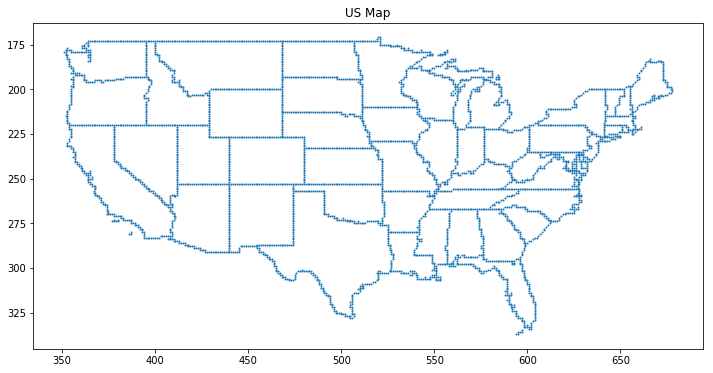

In [12]:
B_X = []
B_Y = []
S   = ''

for i in range(1,511):
    for j in range(1,1023):
        if ((UM[i,j] != UM[i+1,j])or(UM[i,j] != UM[i,j+1])):
            B_X.append(j),B_Y.append(i)
            S += str(j)+' '+str(i)+'\n'
S = S[:-1]
f = open('USA_boundaries.txt','w')
f.write(S)
f.close()

fig,ax = plt.subplots(figsize=(12,6))
ax.plot(B_X,B_Y,'.',ms=2.0)
ax.invert_yaxis()
ax.set_title('US Map')
plt.savefig('US_Map_Default.png',dpi=300,bbox_inches='tight')
plt.show()
            
            
        

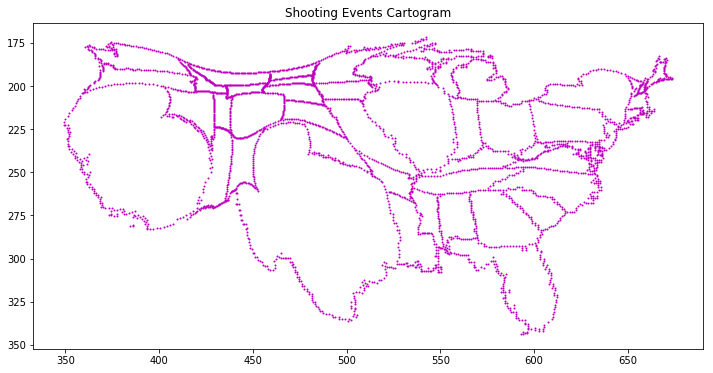

In [24]:
#------------------transformed-------------------#
S = open('US_gun_events_boundaries.txt','r').read()
S = 'Y,X\n'+S
S = S.replace(' ',',')
f = open('tmp.csv','w').write(S)
xy = pd.read_csv('tmp.csv')
Y,X = xy.Y,xy.X
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(Y,X,'.',color='m',ms=2)
ax.invert_yaxis()
ax.set_title('Shooting Events Cartogram')
plt.savefig('n_events.png',dpi=300,bbox_inches='tight')
plt.show()

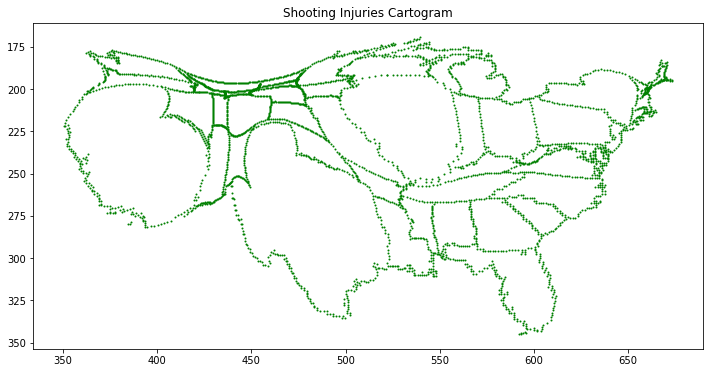

In [25]:
#------------------transformed-------------------#
S = open('US_gun_injured_boundaries.txt','r').read()
S = 'Y,X\n'+S
S = S.replace(' ',',')
f = open('tmp.csv','w').write(S)
xy = pd.read_csv('tmp.csv')
Y,X = xy.Y,xy.X
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(Y,X,'.',color='g',ms=2)
ax.invert_yaxis()
ax.set_title('Shooting Injuries Cartogram')
plt.savefig('n_injured.png',dpi=300,bbox_inches='tight')
plt.show()

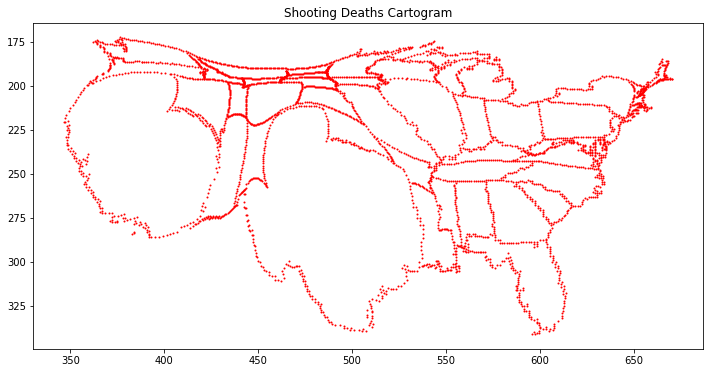

In [26]:
#------------------transformed-------------------#
S = open('US_gun_killed_boundaries.txt','r').read()
S = 'Y,X\n'+S
S = S.replace(' ',',')
f = open('tmp.csv','w').write(S)
xy = pd.read_csv('tmp.csv')
Y,X = xy.Y,xy.X
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(Y,X,'.',color='r',ms=2)
ax.invert_yaxis()
ax.set_title('Shooting Deaths Cartogram')
plt.savefig('n_dead.png',dpi=300,bbox_inches='tight')
plt.show()

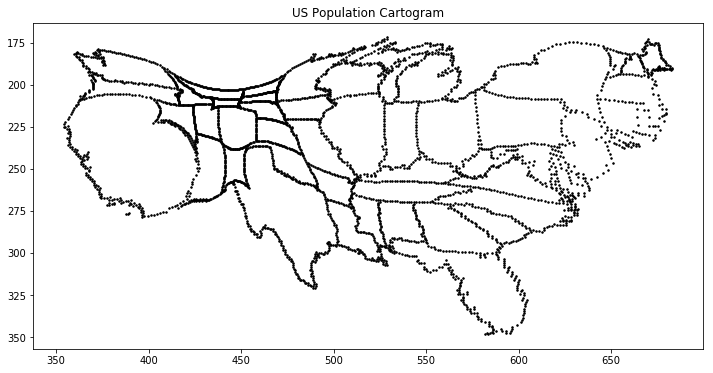

In [16]:
#------------------transformed-------------------#
S = open('US_pop_boundaries.txt','r').read()
S = 'Y,X\n'+S
S = S.replace(' ',',')
f = open('tmp.csv','w').write(S)
xy = pd.read_csv('tmp.csv')
Y,X = xy.Y,xy.X
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(Y,X,'.',color='k',ms=3)
ax.invert_yaxis()
ax.set_title('US Population Cartogram')
plt.savefig('US_Pop.png',dpi=300,bbox_inches='tight')
plt.show()